# Bot traffic plot

In [12]:
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import configuration as conf

In [2]:
# Create and format some new columns
data_df = pd.read_csv(conf.FRAGMENT_TURNAROUND_DATA, header = None)
data_df.rename(columns={0: 'Time fragment received', 1: 'Time reply returned'}, inplace=True)
data_df['Fragment datetime'] = pd.to_datetime(data_df['Time fragment received'], unit = 's')
data_df['dT'] = data_df['Time reply returned'] - data_df['Time fragment received']
data_df.head()

,Time fragment received,Time reply returned,Fragment datetime,dT
0,1.722537e+09,1.722537e+09,2024-08-01 18:34:10.826930944,8.378661
1,1.722546e+09,1.722546e+09,2024-08-01 20:56:22.339653376,0.566514
2,1.722571e+09,1.722572e+09,2024-08-02 04:04:57.989663232,5.232569
3,1.722589e+09,1.722589e+09,2024-08-02 08:51:06.066894336,6.660225


In [3]:
# Get time now to set x-axis limits
x_max = time.time()

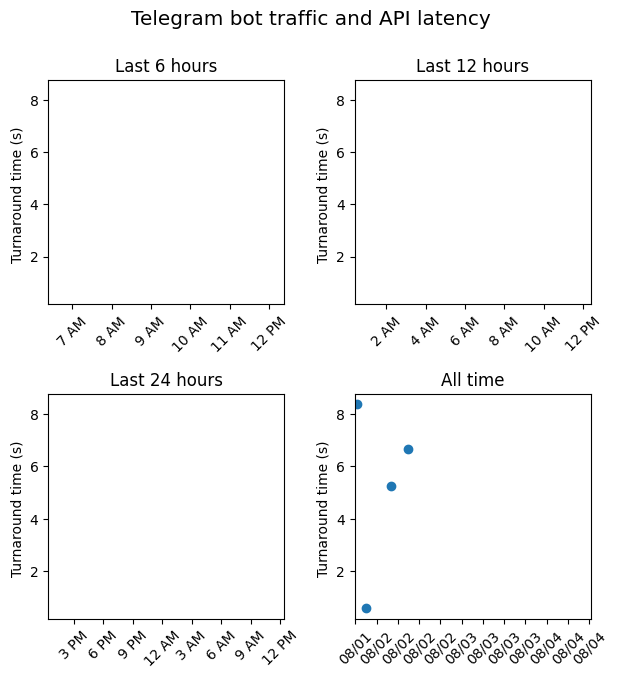

In [11]:
fig, axs = plt.subplots(
    2,
    2, 
    figsize=(7, 7),
    gridspec_kw = {'wspace':0.3, 'hspace':0.4}
)

fig.suptitle('Telegram bot traffic and API latency', size = 'x-large')

date_fmt = mdates.DateFormatter('%-I %p')

axs[0,0].set_title('Last 6 hours')
axs[0,0].scatter(data_df['Fragment datetime'], data_df['dT'])

x_min = x_max - (6 * 60 * 60)

axs[0,0].set_xlim(
    pd.to_datetime(x_min, unit = 's'),
    pd.to_datetime(x_max, unit = 's')
)

axs[0,0].set_xticks(axs[0,0].get_xticks().tolist())
axs[0,0].set_xticklabels(axs[0,0].get_xticks(), rotation = 45)
axs[0,0].xaxis.set_major_formatter(date_fmt)
axs[0,0].set_ylabel('Turnaround time (s) ')

axs[0,1].set_title('Last 12 hours')
axs[0,1].scatter(data_df['Fragment datetime'], data_df['dT'])

x_min = x_max - (12 * 60 * 60)

axs[0,1].set_xlim(
    pd.to_datetime(x_min, unit = 's'),
    pd.to_datetime(x_max, unit = 's')
)

axs[0,1].set_xticks(axs[0,1].get_xticks().tolist())
axs[0,1].set_xticklabels(axs[0,1].get_xticks(), rotation = 45)
axs[0,1].xaxis.set_major_formatter(date_fmt)
axs[0,1].set_ylabel('Turnaround time (s) ')

axs[1,0].set_title('Last 24 hours')
axs[1,0].scatter(data_df['Fragment datetime'], data_df['dT'])

x_min = x_max - (24 * 60 * 60)

axs[1,0].set_xlim(
    pd.to_datetime(x_min, unit = 's'),
    pd.to_datetime(x_max, unit = 's')
)

axs[1,0].set_xticks(axs[1,0].get_xticks().tolist())
axs[1,0].set_xticklabels(axs[1,0].get_xticks(), rotation = 45)
axs[1,0].xaxis.set_major_formatter(date_fmt)
axs[1,0].set_ylabel('Turnaround time (s) ')

axs[1,1].set_title('All time')
axs[1,1].scatter(data_df['Fragment datetime'], data_df['dT'])
axs[1,1].set_xlim(xmax = pd.to_datetime(x_max, unit = 's'))
axs[1,1].set_xticks(axs[1,1].get_xticks().tolist())
axs[1,1].set_xticklabels(axs[1,1].get_xticks(), rotation = 45)
axs[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
axs[1,1].set_ylabel('Turnaround time (s) ')

plt.show()

In [15]:
# Save the plot
date = datetime.datetime.now().strftime("%Y-%m-%d_%H:%M")
fig.savefig(f'{conf.LOG_PATH}/{date}_bot_traffic.jpg', dpi = 150)